In [15]:
# Traditional stuff. pandas to read data and pyplot
import pandas as pd
import matplotlib.pyplot as plt

# Basemap to handle maps
from mpl_toolkits.basemap import Basemap

# Those to are used to create the sub-map in the plot
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Polygon to plot a rectangle over the area zoomed in the main plot
from matplotlib.patches import Polygon

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

In [16]:
df = pd.read_csv('units.csv')

In [17]:
df.head()

,Unidade Maritima,Longitude,Latitude
0,Porto,-41.767097,-22.383761
1,UM-01,-40.425838,-22.436926
2,UM-02,-40.413088,-22.449015
3,UM-03,-40.331275,-22.253827
4,UM-04,-40.763851,-22.796269


In [18]:
df.describe()

,Longitude,Latitude
count,104.000000,104.000000
mean,-40.142171,-21.913754
std,0.898203,2.060933
min,-42.818889,-25.573964
25%,-40.420542,-22.551331
50%,-40.113461,-22.375266
75%,-39.958253,-21.993587
max,-36.341389,-11.184364


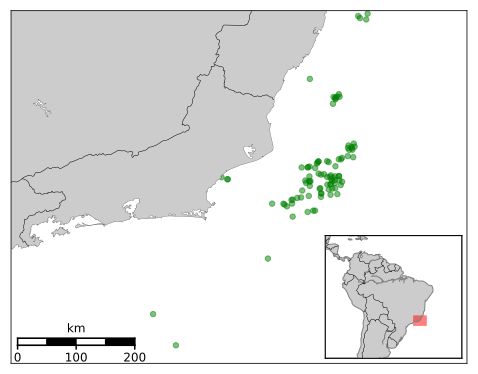

In [19]:
fig = plt.gcf()
fig.set_size_inches(12, 6.5)
ax = fig.add_subplot(111)


m = Basemap(projection='merc', 
            llcrnrlat=-25, urcrnrlat=-20, 
            llcrnrlon=-45, urcrnrlon=-38,  
            resolution='h')

m.drawcoastlines(color='black', linewidth=0.2)  # add coastlines
m.drawstates()
m.fillcontinents()
m.drawmapscale(-44, -24.7, -38, -20, 200, fontsize = 12, barstyle='fancy')

x, y = m(df.Longitude.values, df.Latitude.values)  # transform coordinates
plt.scatter(x, y, 30, marker='o', color='g', alpha=0.5) 


# Submapa
axins = zoomed_inset_axes(ax,zoom=0.03, loc=4)
axins.set_xlim(-43,-37)
axins.set_ylim(-24, -20)
plt.xticks(visible=False)
plt.yticks(visible=False)

map2 = Basemap(projection='merc', 
               llcrnrlat=-39, urcrnrlat=20, 
               llcrnrlon=-90, urcrnrlon=-20, 
               ax=axins, resolution='c')     # This map doesn't need too high resolution
map2.drawmapboundary()
map2.fillcontinents()
map2.drawcoastlines(color='gray')
map2.drawcountries()

x1,y1 = map2(-45,-25) 
x2,y2 = map2(-45,-20) 
x3,y3 = map2(-38,-20) 
x4,y4 = map2(-38,-25)

poly = Polygon( [(x1,y1),(x2,y2),(x3,y3),(x4,y4)], facecolor='red', alpha=0.5)
plt.gca().add_patch(poly)

plt.savefig('mapa.png', dpi=300, transparent=False, bbox_inches = 'tight')

plt.show()